In [0]:
%matplotlib inline

## Time to build a neural network!
First let's import some prerequisites

In [0]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


## Load training data

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Let's look at some examples of the training data

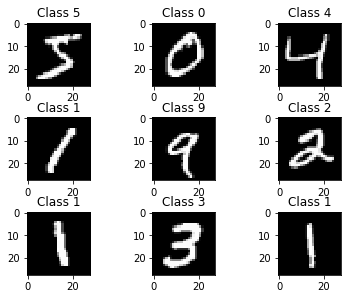

In [0]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.subplots_adjust(top=1, wspace=0.5, hspace=0.5)
    plt.title("Class {}".format(train_labels[i]))

## Keras Model

In [0]:
input_dim = 28*28

input_layer = layers.Input(shape=(input_dim,))
hidden1 = layers.Dense(256, activation='relu')(input_layer)
hidden2 = layers.Dense(64, activation='relu')(hidden1)
output_layer = layers.Dense(10, activation='softmax')(hidden2)

model = models.Model(inputs=input_layer, outputs=output_layer)

# network = models.Sequential()

# input = network.add(layers.Dense(input_shape=(28 * 28,), activation='relu'))
# hidden1 = network.add(layers.Dense(activation='relu', input_shape=(28 * 28,)))
# network.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


## Transforming data

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Training Model

In [0]:
# model.fit(train_images, train_labels, epochs=5, batch_size=128)
history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=128,
                    shuffle=True).history

Epoch 1/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0081 - acc: 0.9973
Epoch 2/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0096 - acc: 0.9968
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0042 - acc: 0.9987
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0039 - acc: 0.9988
Epoch 5/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0057 - acc: 0.9982


## Testing and Evaluation

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

10000/10000 [==============================] - 0s 38us/step
test_acc: 0.9793 test_loss 0.09009196095700868
